In [164]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
!pip install kaggle

     |████████████████████████████████| 58 kB 3.4 MB/s eta 0:00:011
     |████████████████████████████████| 78 kB 7.0 MB/s  eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=9ed2a3f3dbab897f614857f54bf92c7abc42c4a9256c8b2340331cd31ee2d7d1
  Stored in directory: /Users/Rime/Library/Caches/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [13]:
!kaggle datasets list

ref                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                         3GB  2022-02-05 20:51:56            835         78  0.88235295       
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09           2280         68  1.0              
yasserh/wine-quality-dataset                                Wine Quality Dataset                                21KB  2022-01-15 19:15:11           2027         80  1.0              
yamqwe/netflix-showse                                       Netflix Shows            

In [20]:
!kaggle kernels list

ref                                                               title                                            author                   lastRunTime          totalVotes  
----------------------------------------------------------------  -----------------------------------------------  -----------------------  -------------------  ----------  
mohinurabdurahimova/credit-card-fraud-detection-machine-learning  Credit Card Fraud Detection | Machine Learning   Mokhinur Abdurakhimova   2022-02-07 16:20:03           7  
nbroad/qa-ner-hybrid-infer-nbme                                   QA/NER hybrid infer 🔥 [NBME]                     Nicholas Broad 🐶         2022-02-07 17:32:02          39  
songulerdem/energy-consumption-forecasting-with-pycaret           Energy Consumption Forecasting with PyCaret      Songul Erdem Guler       2022-02-07 08:45:58          19  
remekkinas/tps-02-bacteria-as-image-keras-conv2d                  ☀️ TPS-02 - Bacteria as image - Keras Conv2D ☀️  Remek Kinas    

In [1]:
#The data is a European soccer database
database = 'database.sqlite'

In [5]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                     FROM sqlite_master
                     WHERE type = 'table';""",conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [11]:
countries = pd.read_sql("""SELECT *
            FROM Country;""",conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [14]:
pd.read_sql("""SELECT * FROM League;""",conn)


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [19]:
#connect country to its league
leagues = pd.read_sql("""SELECT * 
                        FROM League l
                        LEFT JOIN Country c
                        ON c.id=l.country_id;""",conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


In [20]:
pd.read_sql("""SELECT * FROM Team;""",conn)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [25]:
#retrieve top 10 teams with the long team name alphabatically
teams = pd.read_sql("""SELECT *
                        FROM Team
                        ORDER BY team_long_name 
                        LIMIT 10;""",conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


In [41]:
match = pd.read_sql('''select * from Match LIMIT 5;''',conn)
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [45]:
pd.read_sql('pragma table_info(match);',conn)[:20]

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,country_id,INTEGER,0,None,0
2,2,league_id,INTEGER,0,None,0
3,3,season,TEXT,0,None,0
4,4,stage,INTEGER,0,None,0
5,5,date,TEXT,0,None,0
6,6,match_api_id,INTEGER,0,None,0
7,7,home_team_api_id,INTEGER,0,None,0
8,8,away_team_api_id,INTEGER,0,None,0
9,9,home_team_goal,INTEGER,0,None,0


In [72]:
#retreive the German league, their team names, league name, season, stage, date,long name for both home and 
#away teams playing
query = """
    SELECT m.id as match_id, 
    c.name as country_name,
    l.name as league_name,
    m.season, 
    t1.team_long_name as Home_team_name,
    t2.team_long_name as Away_team_name, 
    m.stage, 
    m.date,
    m.home_team_goal, 
    m.away_team_goal
    
    FROM Match m
    JOIN Country c
    ON m.country_id = c.id
    
    LEFT JOIN League l
    ON m.league_id=l.id
    
    LEFT JOIN Team t1
    ON m.home_team_api_id=t1.team_api_id
    
    LEFT JOIN Team t2
    ON m.away_team_api_id=t2.team_api_id
    
    WHERE country_name='Spain'
    LIMIT 10;
    """


pd.read_sql(query,conn)

,match_id,country_name,league_name,season,Home_team_name,Away_team_name,stage,date,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,Valencia CF,RCD Mallorca,1,2008-08-30 00:00:00,3,0
1,21519,Spain,Spain LIGA BBVA,2008/2009,CA Osasuna,Villarreal CF,1,2008-08-31 00:00:00,1,1
2,21520,Spain,Spain LIGA BBVA,2008/2009,RC Deportivo de La Coruña,Real Madrid CF,1,2008-08-31 00:00:00,2,1
3,21521,Spain,Spain LIGA BBVA,2008/2009,CD Numancia,FC Barcelona,1,2008-08-31 00:00:00,1,0
4,21522,Spain,Spain LIGA BBVA,2008/2009,Racing Santander,Sevilla FC,1,2008-08-31 00:00:00,1,1
5,21523,Spain,Spain LIGA BBVA,2008/2009,Real Sporting de Gijón,Getafe CF,1,2008-08-31 00:00:00,1,2
6,21524,Spain,Spain LIGA BBVA,2008/2009,Real Betis Balompié,RC Recreativo,1,2008-08-31 00:00:00,0,1
7,21525,Spain,Spain LIGA BBVA,2008/2009,RCD Espanyol,Real Valladolid,1,2008-08-30 00:00:00,1,0
8,21526,Spain,Spain LIGA BBVA,2008/2009,Athletic Club de Bilbao,UD Almería,1,2008-08-31 00:00:00,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,Atlético Madrid,Málaga CF,1,2008-08-31 00:00:00,4,0


In [119]:
#the number of rows that will be returned

query = """
   
        SELECT m.id as match_id, 
        c.name as country_name,
        l.name as league_name,
        m.season, 
        t1.team_long_name as Home_team_name,
        t2.team_long_name as Away_team_name, 
        m.stage, 
        m.date,
        m.home_team_goal, 
        m.away_team_goal

        FROM Match m
        JOIN Country c
        ON m.country_id = c.id

        LEFT JOIN League l
        ON m.league_id=l.id

        LEFT JOIN Team t1
        ON m.home_team_api_id=t1.team_api_id

        LEFT JOIN Team t2
        ON m.away_team_api_id=t2.team_api_id

        WHERE country_name='Spain';"""
print('The number of rows returned')
leagues_by_country = pd.read_sql(query,conn)
leagues_by_country

The number of rows returned


,match_id,country_name,league_name,season,Home_team_name,Away_team_name,stage,date,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,Valencia CF,RCD Mallorca,1,2008-08-30 00:00:00,3,0
1,21519,Spain,Spain LIGA BBVA,2008/2009,CA Osasuna,Villarreal CF,1,2008-08-31 00:00:00,1,1
2,21520,Spain,Spain LIGA BBVA,2008/2009,RC Deportivo de La Coruña,Real Madrid CF,1,2008-08-31 00:00:00,2,1
3,21521,Spain,Spain LIGA BBVA,2008/2009,CD Numancia,FC Barcelona,1,2008-08-31 00:00:00,1,0
4,21522,Spain,Spain LIGA BBVA,2008/2009,Racing Santander,Sevilla FC,1,2008-08-31 00:00:00,1,1
...,...,...,...,...,...,...,...,...,...,...
3035,24553,Spain,Spain LIGA BBVA,2015/2016,Atlético Madrid,Valencia CF,9,2015-10-25 00:00:00,2,1
3036,24554,Spain,Spain LIGA BBVA,2015/2016,Málaga CF,RC Deportivo de La Coruña,9,2015-10-24 00:00:00,2,0
3037,24555,Spain,Spain LIGA BBVA,2015/2016,Athletic Club de Bilbao,Real Sporting de Gijón,9,2015-10-26 00:00:00,3,0
3038,24556,Spain,Spain LIGA BBVA,2015/2016,Granada CF,Real Betis Balompié,9,2015-10-24 00:00:00,1,1


### Analytical Analysis

In [83]:
pd.read_sql('''select * from match limit 2;''',conn)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6


In [79]:
pd.read_sql('''select * from country limit 2;''',conn)

,id,name
0,1,Belgium
1,1729,England


In [81]:
pd.read_sql('''select * from player limit 2;''',conn)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146


In [84]:
pd.read_sql('''select * from team limit 2;''',conn)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673,KRC Genk,GEN
1,2,9993,675,Beerschot AC,BAC


In [82]:
pd.read_sql('''select * from league limit 2;''',conn)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


In [132]:
#I want the league name by country, the number of stages where there games, the total number of teams per 
#league/country the number of goals scored by the home team and the away team, the difference between them 
#the avg and total goals by home and away for Spain, Italy, Germany, England, and France
#
query= """
    SELECT c.name as country, 
    l.name as league_name,
    m.season as season,
    date,
    count(DISTINCT stage) as number_of_stages,
    count(DISTINCT ht.team_long_name) as number_of_teams,
    avg(m.home_team_goal) as avg_home_goal,
    avg(m.away_team_goal) as avg_away_goal,
    avg((m.home_team_goal)- (m.away_team_goal)) as avg_goal_diff,
    avg((m.home_team_goal)+ (m.away_team_goal)) as avg_goals,
    sum((m.home_team_goal)+ (m.away_team_goal)) as total_goals
     
    FROM Match m
    JOIN Country c ON c.id = m.country_id
    
    LEFT JOIN League l ON l.id=m.league_id
    LEFT JOIN Team ht ON ht.team_api_id = m.home_team_api_id
    LEFT JOIN Team at ON at.team_api_id = m. away_team_api_id
    
    WHERE country IN ('Spain','France','Germany','Italy','England')
    GROUP BY Country,league_name, season
    HAVING number_of_stages>10
    ORDER BY country, league_name, season DESC
    LIMIT 10;
    """
games_by_season = pd.read_sql(query,conn)
games_by_season

,country,league_name,season,date,number_of_stages,number_of_teams,avg_home_goal,avg_away_goal,avg_goal_diff,avg_goals,total_goals
0,England,England Premier League,2015/2016,2015-08-09 00:00:00,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,2014-08-16 00:00:00,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,2013-08-17 00:00:00,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,2012-08-18 00:00:00,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,2011-08-13 00:00:00,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,2010-08-14 00:00:00,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,2009-08-16 00:00:00,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,2008-08-17 00:00:00,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,2015-08-08 00:00:00,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,2014-08-08 00:00:00,38,20,1.410526,1.081579,0.328947,2.492105,947


In [133]:
query= """
    SELECT c.name as country, 
    l.name as league_name,
    m.season as season,
    date,
    count(DISTINCT stage) as number_of_stages,
    count(DISTINCT ht.team_long_name) as number_of_teams,
    avg(m.home_team_goal) as avg_home_goal,
    avg(m.away_team_goal) as avg_away_goal,
    avg((m.home_team_goal)- (m.away_team_goal)) as avg_goal_diff,
    avg((m.home_team_goal)+ (m.away_team_goal)) as avg_goals,
    sum((m.home_team_goal)+ (m.away_team_goal)) as total_goals
     
    FROM Match m
    JOIN Country c ON c.id = m.country_id
    
    LEFT JOIN League l ON l.id=m.league_id
    LEFT JOIN Team ht ON ht.team_api_id = m.home_team_api_id
    LEFT JOIN Team at ON at.team_api_id = m. away_team_api_id
    
    WHERE country IN ('Spain','France','Germany','Italy','England')
    GROUP BY Country,league_name, season
    HAVING number_of_stages>10
    ORDER BY country, league_name, season DESC;"""

games_by_season = pd.read_sql(query,conn)

In [125]:
type(games_by_season)

pandas.core.frame.DataFrame

#### Create a dataframe from table to run analysis on

In [145]:
list(games_by_season.loc[games_by_season['country'] == 'Germany','avg_goals'])
#df.loc[:,'Germany']

[2.8300653594771243,
 2.7549019607843137,
 3.1601307189542482,
 2.934640522875817,
 2.8594771241830066,
 2.9215686274509802,
 2.8300653594771243,
 2.9215686274509802]

In [147]:
#create dataframe for average goals per season for each countrywith the season as the index
df = pd.DataFrame(index=np.sort(games_by_season['season'].unique()),columns=games_by_season['country'].unique())

df.loc[:,'Germany'] = list(games_by_season.loc[games_by_season['country'] == 'Germany','avg_goals'])
df.loc[:,'England'] = list(games_by_season.loc[games_by_season['country'] == 'England','avg_goals'])
df.loc[:,'France'] = list(games_by_season.loc[games_by_season['country'] == 'France','avg_goals'])
df.loc[:,'Italy'] = list(games_by_season.loc[games_by_season['country'] == 'Italy','avg_goals'])
df.loc[:,'Spain'] = list(games_by_season.loc[games_by_season['country'] == 'Spain','avg_goals'])

df

,England,France,Germany,Italy,Spain
2008/2009,2.700000,2.526316,2.830065,2.576316,2.744737
2009/2010,2.565789,2.492105,2.754902,2.686016,2.655263
2010/2011,2.768421,2.455263,3.160131,2.723684,2.750000
2011/2012,2.797368,2.544737,2.934641,2.639474,2.871053
2012/2013,2.805263,2.515789,2.859477,2.583799,2.763158
2013/2014,2.797368,2.342105,2.921569,2.513158,2.742105
2014/2015,2.771053,2.410526,2.830065,2.610526,2.713158
2015/2016,2.478947,2.257895,2.921569,2.600000,2.897368


### Data Analysis

Text(0, 0.5, '# Goals')

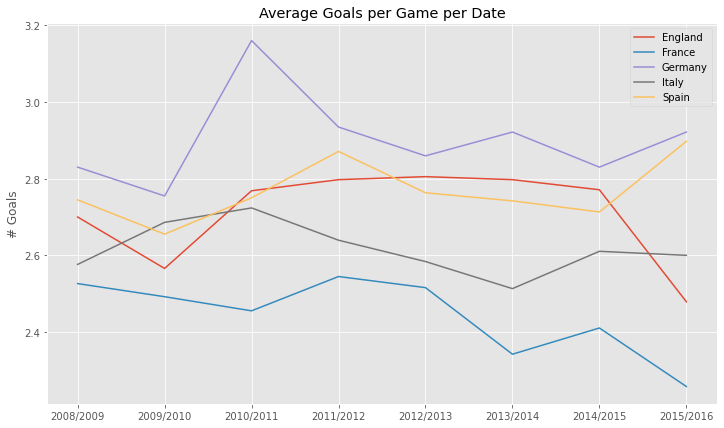

In [171]:
plt.style.use('ggplot')
df.plot(title='Average Goals per Game per Date',figsize=(12,7))
plt.ylabel('# Goals')

#### Average goal difference between home vs away teams

In [174]:
df = pd.DataFrame(index=np.sort(games_by_season['season'].unique()),columns=games_by_season['country'].unique())

df.loc[:,'Germany'] = list(games_by_season.loc[games_by_season['country'] == 'Germany','avg_goal_diff'])
df.loc[:,'England'] = list(games_by_season.loc[games_by_season['country'] == 'England','avg_goal_diff'])
df.loc[:,'France'] = list(games_by_season.loc[games_by_season['country'] == 'France','avg_goal_diff'])
df.loc[:,'Italy'] = list(games_by_season.loc[games_by_season['country'] == 'Italy','avg_goal_diff'])
df.loc[:,'Spain'] = list(games_by_season.loc[games_by_season['country'] == 'Spain','avg_goal_diff'])


df

,England,France,Germany,Italy,Spain
2008/2009,0.284211,0.347368,0.300654,0.365789,0.492105
2009/2010,0.381579,0.328947,0.421569,0.311346,0.418421
2010/2011,0.378947,0.376316,0.336601,0.350000,0.513158
2011/2012,0.318421,0.392105,0.248366,0.350000,0.502632
2012/2013,0.373684,0.431579,0.460784,0.438547,0.594737
2013/2014,0.450000,0.342105,0.372549,0.350000,0.531579
2014/2015,0.623684,0.368421,0.196078,0.473684,0.486842
2015/2016,0.321053,0.315789,0.477124,0.442105,0.423684


<AxesSubplot:title={'center':'Average Goal difference for Home vs Away'}>

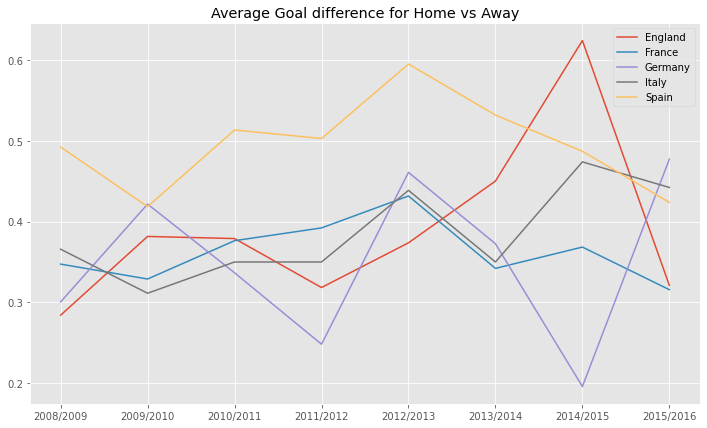

In [177]:
df.plot(figsize=(12,7),title = 'Average Goal difference for Home vs Away')

In [180]:
pd.read_sql("select * from player limit 2",conn)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146


In [187]:
pd.read_sql('select * from Player_Attributes limit 2',conn)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8
1,2,218353,505942,2015-11-19 00:00:00,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8


> I need to join the players table and the team_attribute table, the problem is that player_attribute table has information about the player by season and I want information about the players regardless of season and if I try to join the two tables, I will get a lot of duplications and results will be skewed towards players that appear more. I need to combine the info for one player into one row, I will use average, but max or last season could also be used

In [186]:
pd.read_sql("""select *
from sqlite_master
where type='table';""",conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [ ]:
ps.read_sql()

In [ ]:
pd.read_sql("""SELECT pa.player_api_id, 
                avg(pa.overall_rating) AS overall_rating,
                avg(pa.potential) AS potential
                
                FROM player_attributes
                GROUP BY PA.player_api_id""",conn)

In [193]:
#the table created for subquery
pd.read_sql("""SELECT player_api_id, 
                max((overall_rating) AS overall_rating,
                avg((potential) AS potential
                
                FROM player_attributes
                GROUP BY player_api_id""",conn)

,player_api_id,overall_rating,potential
0,2625,63.0,61.142857
1,2752,72.0,70.380952
2,2768,75.0,70.571429
3,2770,74.0,73.533333
4,2790,73.0,75.800000
...,...,...,...
11055,744907,53.0,65.909091
11056,746419,59.0,66.000000
11057,748432,58.0,68.000000
11058,750435,60.0,70.444444


In [220]:
#find the avg rating, potential and weight for players grouped by height
#there are a few players who are below 165 and above 195


query = """SELECT CASE
            WHEN ROUND (height) < 165 THEN 165
            WHEN ROUND(height) > 195 THEN 195
            ELSE ROUND(height)
            END AS calc_height,     

            COUNT(height) AS distribution,
            avg(player_attribute.overall_rating) AS avg_overall_rating,
            avg(player_attribute.potential) AS avg_overall_potential,
            avg(weight) AS avg_height
            
            FROM player p
            LEFT JOIN (SELECT player_api_id, 
                avg(overall_rating) AS overall_rating,
                avg(potential) AS potential
                
                FROM player_attributes
                GROUP BY player_api_id) AS player_attribute ON p.player_api_id=player_attribute.player_api_id
            GROUP BY calc_height;
            
"""

players_by_height = pd.read_sql(query,conn)
players_by_height

,calc_height,distribution,avg_overall_rating,avg_overall_potential,avg_height
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


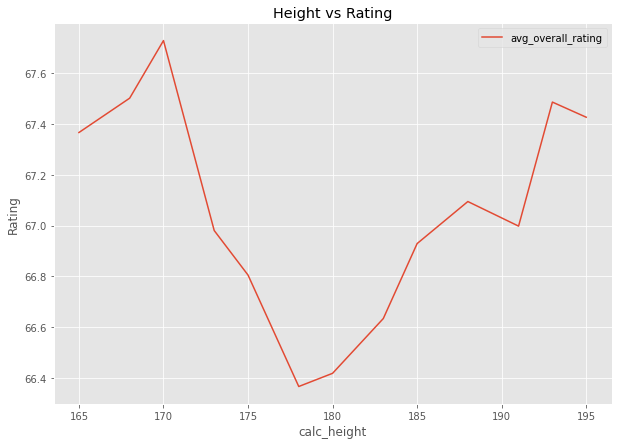

In [230]:
#lets plot
#rating by height

players_by_height.plot(x='calc_height',y='avg_overall_rating',figsize=(10,7), title='Height vs Rating')
plt.ylabel('Rating');

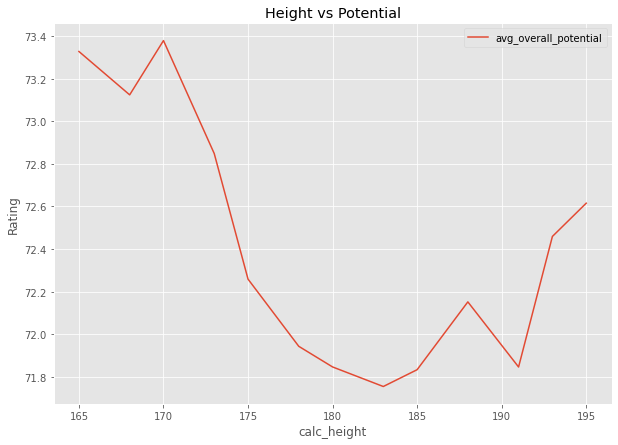

In [231]:
#potential by height
players_by_height.plot(x='calc_height',y='avg_overall_potential',figsize=(10,7), title='Height vs Potential')
plt.ylabel('Rating');

In [233]:
pd.read_sql('select * from team limit 2',conn)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673,KRC Genk,GEN
1,2,9993,675,Beerschot AC,BAC


In [235]:
pd.read_sql('select * from team_attributes limit 2',conn)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
